In [1]:
from sympy import *
init_printing()
from IPython.display import display

In [3]:
x, t = symbols('x t', real=True)
m, epsilon, epsilon_zero = symbols('m epsilon epsilon0', real=True, positive=True)
q = symbols('q', real=True)
v0 = symbols('v0')
v1 = Function('v1')(x,t)
v = v0 + v1

rho0 = symbols('rho0')
rho1 = Function('rho1')(x,t)
rho = rho0 + rho1

J1 = rho0*v1 + rho1*v0

E0 = symbols('E0')
E1 = Function('E1')(x, t)
E = E0 + E1

omega, k, A = symbols('omega k A')

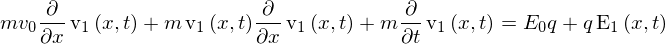

In [4]:
motion = Eq(m*(v.diff(t) + v*v.diff(x)), q*E)
motion.expand()

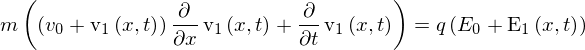

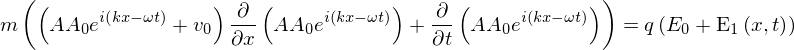

Removing A^2


In [5]:
def linearize(eq, linearized, zeroes = []):
    display(eq)
    coefficients = [symbols("A"+str(i)) for i in range(len(linearized))]
    for coeff, item in zip(coefficients, linearized):
        eq = eq.subs({item: A*coeff*exp(I*(k*x-omega*t))})
        display(eq)
        eq = eq.expand().doit()
        display(eq)
    eq = eq.subs({A**2:0})
    print("Removing A^2")
    display(eq)
    for coeff, item in zip(coefficients, linearized):
        eq = eq.simplify().subs({A*coeff*exp(I*(k*x-omega*t)):item})
        display(eq)
    for item in zeroes:
        eq = eq.subs({item: 0})
        display(eq)
    return eq
motion_expanded = linearize(motion, [v1], [E0])

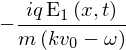

In [6]:
v1_solution, = solve(motion_expanded, v1)
v1_solution

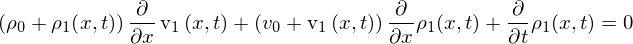

In [7]:
continuity = Eq((rho*v).diff(x) + rho.diff(t))
continuity

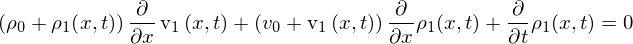

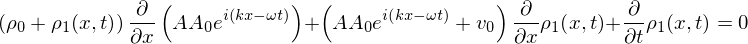

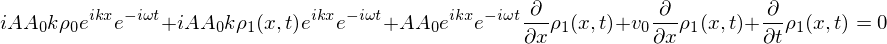

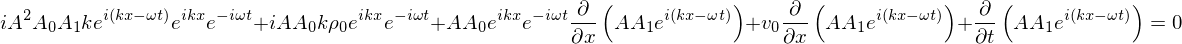

Removing A^2


In [8]:
continuity_expanded = linearize(continuity, [v1, rho1])

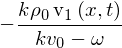

In [9]:
continuity_finished = Eq((v1*k*rho0+rho1*k*v0-omega*rho1))
rho1_solution, = solve(continuity_finished, rho1)
rho1_solution

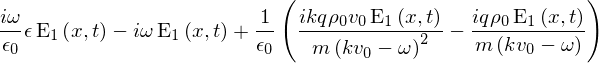

In [29]:
n0 = symbols('n0')
final_eq = J1.subs({v1:v1_solution, rho1:rho1_solution})/epsilon_zero - I*omega*E1 +I*omega*epsilon*E1/epsilon_zero.subs({rho0:n0*q}).simplify()
final_eq

In [30]:
omega_plasma = sqrt(n0*q**2/m/epsilon_zero)
omega_pe = symbols('omega_pe')
omega_pe

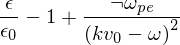

In [50]:
eq14 = simplify(final_eq.subs({rho0: q*n0})/(I*omega*E1)).subs({n0*q**2/m/epsilon_zero:omega_pe^2})
eq14